<a href="https://colab.research.google.com/github/Naomie25/DI-Bootcamp/blob/main/Week4_Day2_DailyChallenge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#Data Import and Cleaning
import pandas as pd
import numpy as np

# Load dataset
df = pd.read_csv('global_power_plant_database.csv')

# Preview
print(df.head())

# Check for missing values
print(df.isnull().sum())

# Convert relevant columns to numeric (e.g., capacity in MW)
df['capacity_mw'] = pd.to_numeric(df['capacity_mw'], errors='coerce')

# Drop rows with critical missing values
df = df.dropna(subset=['capacity_mw', 'primary_fuel', 'country', 'latitude', 'longitude'])


<ipython-input-1-71ca546fe570>:6: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('global_power_plant_database.csv')


  country country_long                                              name  \
0     AFG  Afghanistan      Kajaki Hydroelectric Power Plant Afghanistan   
1     AFG  Afghanistan                                      Kandahar DOG   
2     AFG  Afghanistan                                      Kandahar JOL   
3     AFG  Afghanistan     Mahipar Hydroelectric Power Plant Afghanistan   
4     AFG  Afghanistan  Naghlu Dam Hydroelectric Power Plant Afghanistan   

      gppd_idnr  capacity_mw  latitude  longitude primary_fuel other_fuel1  \
0  GEODB0040538         33.0    32.322    65.1190        Hydro         NaN   
1    WKS0070144         10.0    31.670    65.7950        Solar         NaN   
2    WKS0071196         10.0    31.623    65.7920        Solar         NaN   
3  GEODB0040541         66.0    34.556    69.4787        Hydro         NaN   
4  GEODB0040534        100.0    34.641    69.7170        Hydro         NaN   

  other_fuel2  ... estimated_generation_gwh_2013  \
0         NaN  ...    

In [2]:
#Exploratory Data Analysis (EDA)
# Summary statistics
print(df[['capacity_mw']].describe())

# Median and standard deviation
print("Median:", np.median(df['capacity_mw']))
print("Standard Deviation:", np.std(df['capacity_mw']))

# Count of plants by country
print(df['country'].value_counts().head(10))

# Count of plants by fuel type
print(df['primary_fuel'].value_counts())


        capacity_mw
count  34936.000000
mean     163.355148
std      489.636072
min        1.000000
25%        4.900000
50%       16.745000
75%       75.344250
max    22500.000000
Median: 16.744999999999997
Standard Deviation: 489.6290640362026
country
USA    9833
CHN    4235
GBR    2751
BRA    2360
FRA    2155
IND    1589
DEU    1309
CAN    1159
ESP     829
RUS     545
Name: count, dtype: int64
primary_fuel
Solar             10665
Hydro              7156
Wind               5344
Gas                3998
Coal               2330
Oil                2320
Biomass            1430
Waste              1068
Nuclear             195
Geothermal          189
Storage             135
Other                43
Cogeneration         41
Petcoke              12
Wave and Tidal       10
Name: count, dtype: int64


In [3]:
#Statistical Analysis
# Mean power output by fuel type
grouped = df.groupby('primary_fuel')['capacity_mw']
print(grouped.mean())

# Hypothesis testing: coal vs. solar
from scipy.stats import ttest_ind

coal = df[df['primary_fuel'] == 'Coal']['capacity_mw']
solar = df[df['primary_fuel'] == 'Solar']['capacity_mw']

t_stat, p_value = ttest_ind(coal, solar, equal_var=False)
print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


primary_fuel
Biomass             23.972938
Coal               843.579828
Cogeneration        98.731707
Gas                373.449375
Geothermal          67.130952
Hydro              147.171551
Nuclear           2091.855179
Oil                112.878754
Other               84.020000
Petcoke            202.048125
Solar               17.657039
Storage             12.683704
Waste               13.809657
Wave and Tidal      55.220000
Wind                49.224126
Name: capacity_mw, dtype: float64
T-statistic: 44.88, P-value: 0.0000


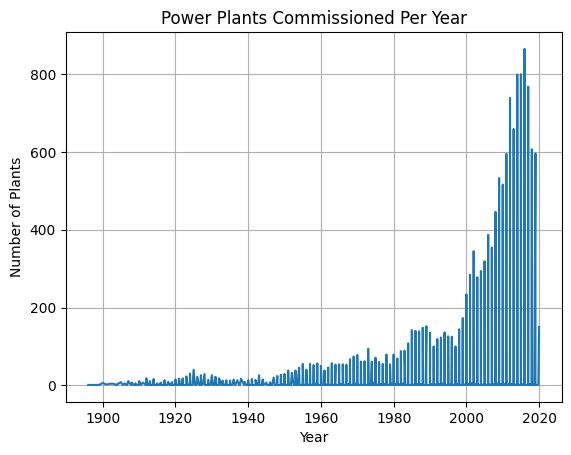

In [4]:
#Time Series Analysis (if year is available)
# If 'commissioning_year' exists:
df['commissioning_year'] = pd.to_numeric(df['commissioning_year'], errors='coerce')
df_year = df.dropna(subset=['commissioning_year'])

# Number of plants per year
year_counts = df_year['commissioning_year'].value_counts().sort_index()

import matplotlib.pyplot as plt
year_counts.plot(kind='line', title='Power Plants Commissioned Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Plants')
plt.grid(True)
plt.show()


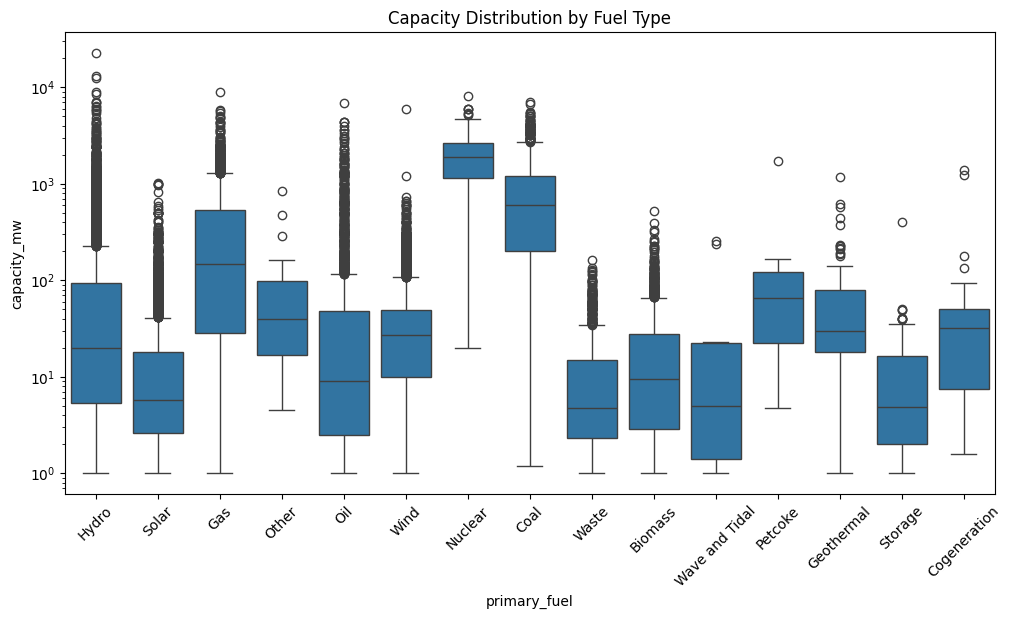

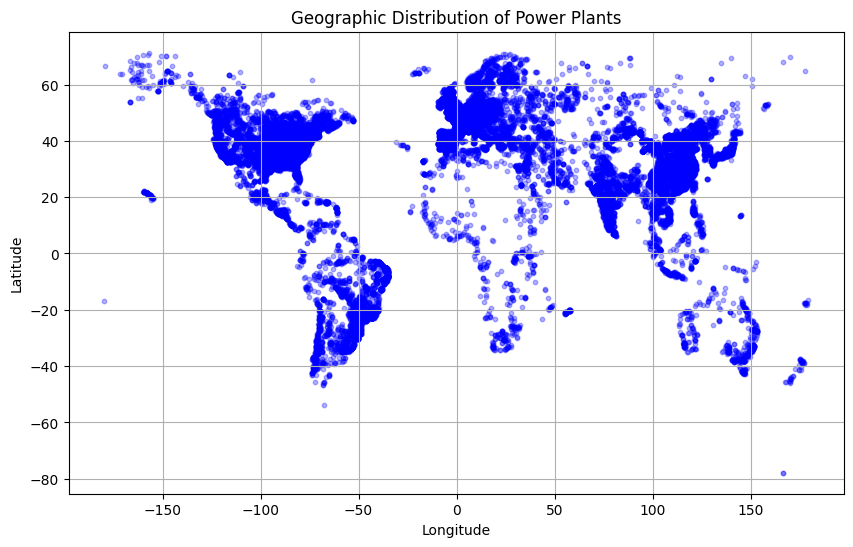

In [5]:
#Advanced Visualization
import seaborn as sns

# Fuel type vs capacity boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='primary_fuel', y='capacity_mw')
plt.yscale('log')
plt.title("Capacity Distribution by Fuel Type")
plt.xticks(rotation=45)
plt.show()

# Geographical distribution
plt.figure(figsize=(10, 6))
plt.scatter(df['longitude'], df['latitude'], c='blue', alpha=0.3, s=10)
plt.title('Geographic Distribution of Power Plants')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid(True)
plt.show()


In [6]:
#Matrix Operations in Context
# Example: Matrix of (latitude, longitude, capacity)
matrix = df[['latitude', 'longitude', 'capacity_mw']].to_numpy()

# Covariance matrix
cov_matrix = np.cov(matrix, rowvar=False)
print("Covariance Matrix:\n", cov_matrix)

# Eigen decomposition
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)
print("Eigenvalues:", eigenvalues)
print("Eigenvectors:\n", eigenvectors)


Covariance Matrix:
 [[ 5.12506327e+02 -1.21328995e+02 -1.46512725e+02]
 [-1.21328995e+02  6.14747738e+03  5.81707732e+03]
 [-1.46512725e+02  5.81707732e+03  2.39743483e+05]]
Eigenvalues: [239888.34493566    509.89320204   6005.22827679]
Eigenvectors:
 [[ 6.24482185e-04 -9.99770514e-01  2.14133001e-02]
 [-2.48794803e-02 -2.14222092e-02 -9.99460905e-01]
 [-9.99690263e-01 -9.13937503e-05  2.48871486e-02]]


                  name country  capacity_mw
36      Hadjret Ennous     DZA       1200.0
49   Koudiet Eddraouch     DZA       1200.0
68               Terga     DZA       1200.0
95             ALICURA     ARG       1050.0
141          COSTANERA     ARG       1982.2


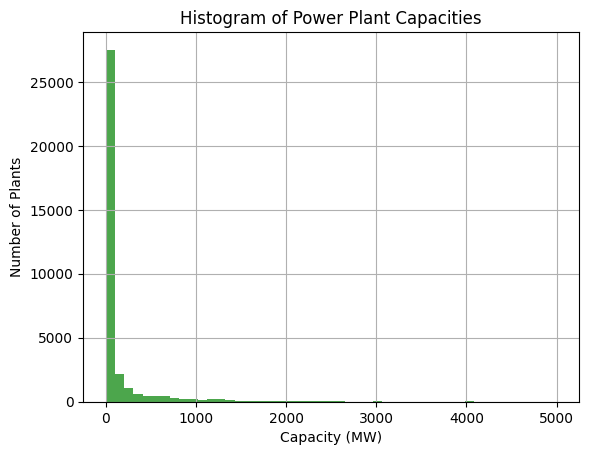

In [7]:
#Integration of NumPy, Pandas, and Matplotlib
# Complex filtering with NumPy
large_plants = df[np.array(df['capacity_mw'] > 1000)]
print(large_plants[['name', 'country', 'capacity_mw']].head())

# Custom histogram bins with NumPy
bins = np.linspace(0, 5000, 50)
plt.hist(df['capacity_mw'], bins=bins, color='green', alpha=0.7)
plt.title("Histogram of Power Plant Capacities")
plt.xlabel("Capacity (MW)")
plt.ylabel("Number of Plants")
plt.grid(True)
plt.show()
